## Diamond Visualization

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

diamonds = pd.read_csv('../../Datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Dataset Overview
Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# High-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


### Features
* **Carat** : Carat weight of the Diamond.
* **Cut** : Describe cut quality of the diamond.
Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* **Color** : Color of the Diamond.
With D being the best and J the worst.
* **Clarity** : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* **Depth** : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table** : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **Price** : the Price of the Diamond.
* **X** : Length of the Diamond in mm.
* **Y** : Width of the Diamond in mm.
* **Z** : Height of the Diamond in mm.
* **Qualitative Features (Categorical)** : Cut, Color, Clarity.

* **Quantitative Features (Numerical)** : Carat, Depth , Table , Price , X , Y, Z.
* **Price** is the Target Variable

<img src="Images/Diamonds_Anatomy.jpg" width="400px"/>

In [4]:
# Descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Univariate Exploration
Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

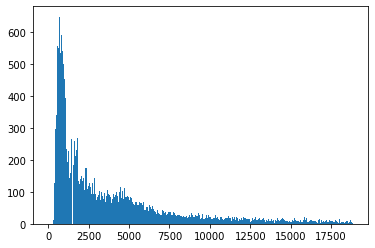

In [5]:
# Univariate plot of diamond prices
# For the numerical variable price, I would choose histogram 
bin_edges = np.arange(0 , diamonds['price'].max()+20 , 20)
plt.hist(data = diamonds , x = 'price', bins = bin_edges);

**Skew** : The initial plots shows that diamond price follows a Right-Skewed Distribution.

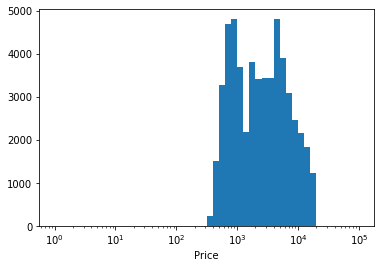

In [26]:
bin_edges = 10 ** np.arange(0, 5+0.1, 0.1)
ticks = [0.1 , 0.3 , 1 , 3 , 10 , 30 , 100 , 300 , 1000 , 3000 , 10000, 30000 , 100000]
labels = [f'{v}' for v in ticks]
plt.hist(data=diamonds, x='price', bins=bin_edges)
plt.xticks(ticks,labels)
plt.xlabel('Price')
plt.xscale('log');

**Modal**: Under a log scale, the data is roughly bimodal.

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?


(0, 3)

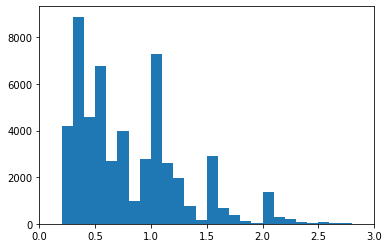

In [14]:
# Univariate plot of carat weights
# Numeric variable so I still choose histgram 
bin_edges = np.arange(0 , diamonds['carat'].max()+0.1 , 0.1)
plt.hist(data = diamonds , x = 'carat', bins = bin_edges);
plt.xlim(0,3)


Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

* univariate plots of cut, color, and clarity grades
* cut, color, and clarity are all categorical variables so I would choose a bar chart
* since they're ordinal in nature, the bars should be sorted in order of increasing quality level.

<img src="Images/Diamonds_Cut.jpg" width="500px"/>

In [30]:
# make them orderd 
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [17]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

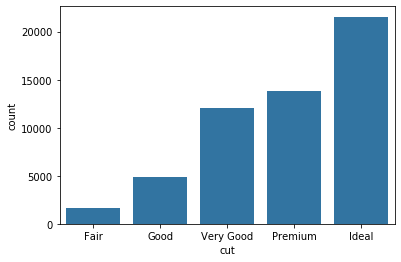

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'cut', color = base_color);

<span>**Cut distribution comment**: The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

<img src="Images/Diamonds_Color.jpg" width="500px"/>

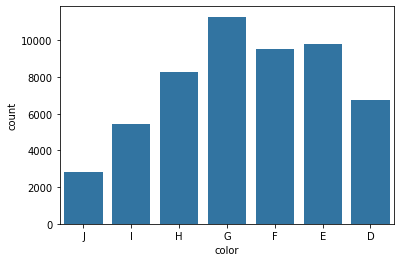

In [21]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'color', color = base_color);

**Color distribution comment**: The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)

<img src="Images/Diamonds_Clarity.jpg" width="400px"/>

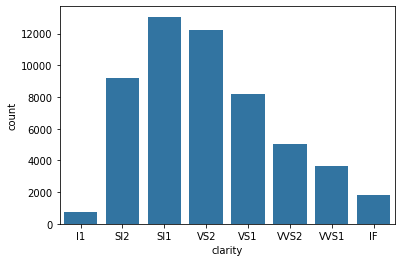

In [24]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'clarity', color = base_color);

**Clarity distribution comment**:There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).

#### Bivaraite Exploration
Above is a univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

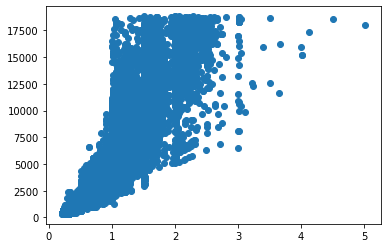

In [26]:
# Bivariate plot of price vs. carat 
# Numeric variable and numeric variable : scatter plot
base_color = sb.color_palette()[0]
plt.scatter(data = diamonds , x = 'carat' , y = 'price');

**Price vs. Carat comment 1**:Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.

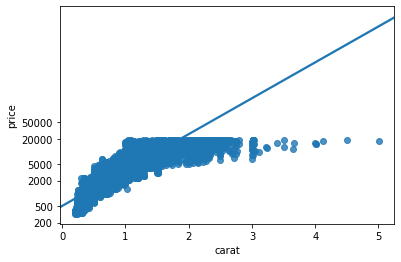

In [29]:
# Add a log transformation to the price axis
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
sb.regplot(diamonds['carat'], diamonds['price'].apply(log_trans));
tick_locs = [200, 500 , 2000, 5000, 20000,50000]
plt.yticks(log_trans(tick_locs), tick_locs); # add a transformation to the price axis.

**Price vs. Carat comment 2**: Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

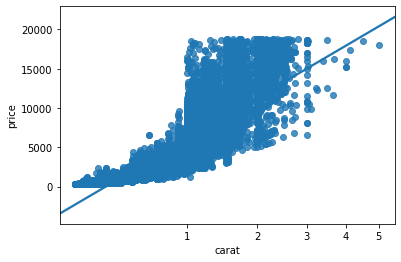

In [31]:
# Add cube-root transformation of carat
def cube_root_trans(x, inverse = False):
    if not inverse:
        return np.power(x , 1/3)
    else:
        return np.power(x , 3)
    

sb.regplot(diamonds['carat'].apply(cube_root_trans), diamonds['price'] )
tick_locs = [1, 2 , 3, 4, 5] # the tick_locs should be set according to real values 
plt.xticks(cube_root_trans(tick_locs), tick_locs); # add a cube-root transformation to carat axis.

**Price vs. Carat comment 3**: One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

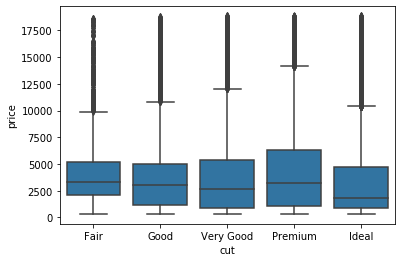

In [36]:
# Bivariate plots of price vs. cut, color, clarity
# Numeric variable and categorical variable : violin plot or box plot 
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'cut', y='price', color=base_color)
plt.xticks();

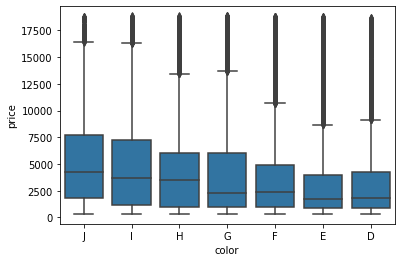

In [35]:
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'color', y='price', color=base_color)
plt.xticks();

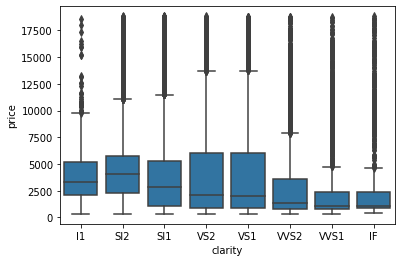

In [37]:
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'clarity', y='price', color=base_color)
plt.xticks();

**Price vs. Categorical comment 1**: There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it decrease with increasing gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?

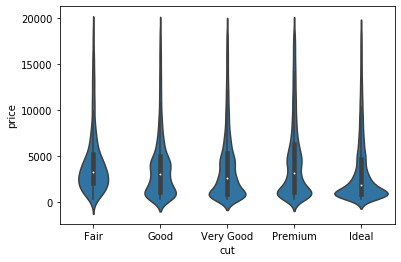

In [39]:
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds , x = 'cut', y='price', color=base_color)
plt.xticks();

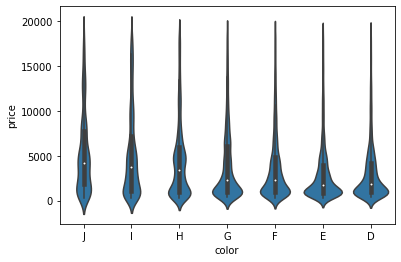

In [40]:
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds , x = 'color', y='price', color=base_color)
plt.xticks();

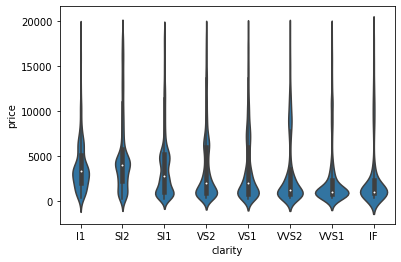

In [41]:
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds , x = 'clarity', y='price', color=base_color)
plt.xticks();

**Price vs. Categorical comment 2**: With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

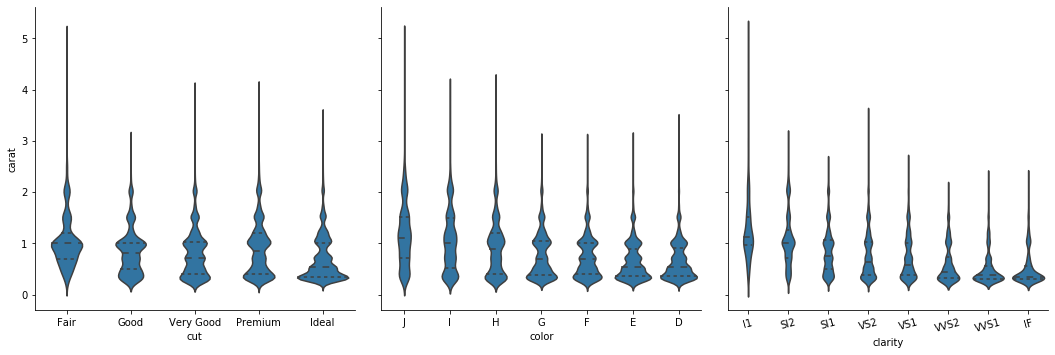

In [43]:
# Bivariate plots of carat vs. cut, color, clarity
# To see the relationships between the independent variables: matrix plot / pairfacet 
categories = ['cut','color','clarity']
g = sb.PairGrid( data = diamonds , x_vars = categories , y_vars = 'carat', height=5)
g.map(sb.violinplot , inner = 'quartile');
plt.xticks(rotation=15);

**Carat vs. Categorical comment**: These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.

#### Multivariate Exploration
In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

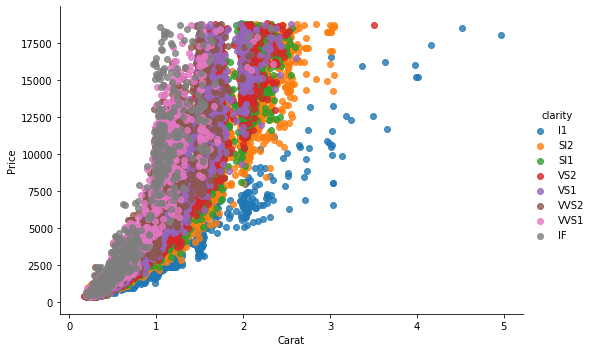

In [47]:
# Too many data points causing overplotting, 
# So I chose palette instead of each color for each type like following: 
g = sb.FacetGrid( data = diamonds, hue = 'clarity',height= 5, aspect=1.5 )
g = g.map(sb.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('Carat')
plt.ylabel('Price');

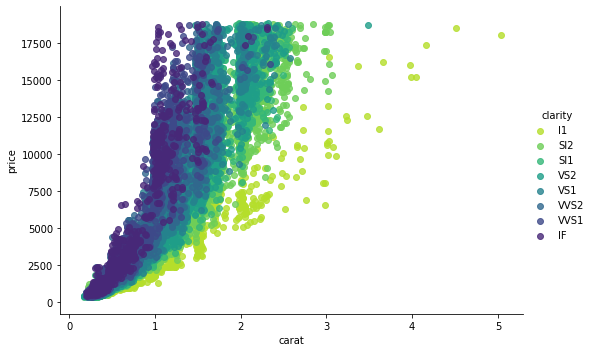

In [49]:
# Multivariate plot of price by carat weight, and clarity
# Two numerical vs one Ordinal categorical(clarity)
# Too much data points causing overplotting, 
# So I chose palette instead of each color for each type like following: 
# g = sb.FacetGrid( data = diamonds, hue = 'clarity',size = 5, aspect=1.5 )

g = sb.FacetGrid( data = diamonds, hue = 'clarity', height = 5, aspect=1.5 , palette = 'viridis_r')
g = g.map(sb.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

**Price by Carat and Clarity Comment 2**: You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?

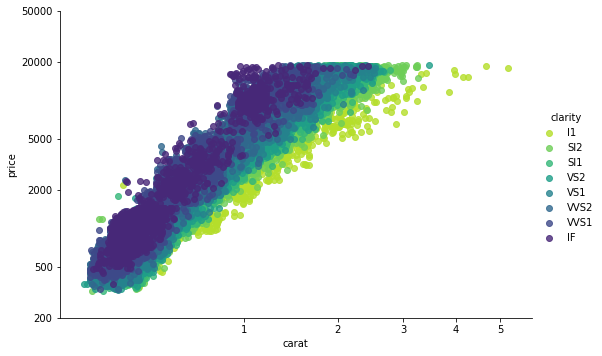

In [52]:
# Let's try to apply transformation functions to price and carat( x and y axis)
def log_trans(y, inverse = False):
    if not inverse:     
        return np.log10(y)     
    else:
        return np.power(10, y)
    
def cuberoot_trans(x, inverse = False):
    if not inverse:     
        return np.power(x, 1/3)     
    else:
        return np.power(x, 3)

#sb.regplot(diamonds['carat'].apply(cuberoot_trans), diamonds['price'].apply(log_trans))
diamonds['carat_cr'] = diamonds['carat'].apply(cuberoot_trans)
diamonds['price_log'] = diamonds['price'].apply(log_trans)

g = sb.FacetGrid( data = diamonds, hue = 'clarity', height = 5, aspect=1.5 , palette = 'viridis_r')
g = g.map(sb.regplot, 'carat_cr' ,'price_log', x_jitter = 0.04 , fit_reg = False);
# pay attention what to be put inside map(), does it really need x = , y = 
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
x_tick_locs = [1, 2, 3, 4, 5]
plt.xticks(cuberoot_trans(x_tick_locs), x_tick_locs)

y_tick_locs = [200, 500 , 2000, 5000, 20000,50000]    # the tick_locs should be set according to real values 
plt.yticks(log_trans(y_tick_locs), y_tick_locs);

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.



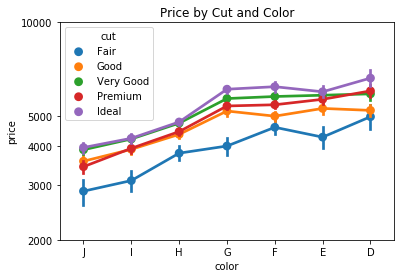

In [33]:
# Multivariate plot of price by cut and color, for approx. 1 carat diamonds
# Two categorical vs one numerical

# Here one parenthesis for each condition is a must 
diamonds_sub = diamonds.loc[ (diamonds['carat']>= 0.99) & (diamonds['carat']<=1.03) , : ]

# cut and color vs price ( two categorical vs one numerical )
def log_trans(y, inverse = False):
    if not inverse:     
        return np.log10(y)     
    else:
        return np.power(10, y)
    
diamonds['price_log'] = diamonds['price'].apply(log_trans)

sb.pointplot(data = diamonds_sub, x = 'color', y = 'price_log', hue = 'cut')
# Cut has less types so choose it as hue

plt.title('Price by Cut and Color')
plt.xlabel('color')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
y_tick_locs = [2000,3000, 4000, 5000, 10000]    # the tick_locs should be set according to real values 
plt.yticks(log_trans(y_tick_locs), y_tick_locs);

**Price by Cut and Color Comment 1**: There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.

**Price by Cut and Color Comment 2**: Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out?

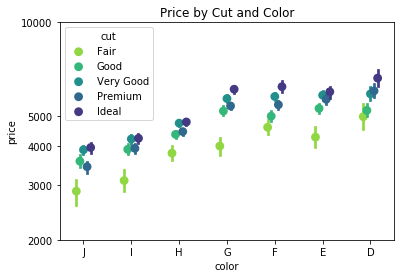

In [54]:
# Multivariate plot of price by cut and color, for approx. 1 carat diamonds
# Two categorical vs one numerical

# here one parenthesis for each condition is a must 
diamonds_sub = diamonds.loc[ (diamonds['carat']>= 0.99) & (diamonds['carat']<=1.03) , : ]

# cut and color vs price ( two categorical vs one numerical )
def log_trans(y, inverse = False):
    if not inverse:     
        return np.log10(y)     
    else:
        return np.power(10, y)
    
diamonds['price_log'] = diamonds['price'].apply(log_trans)

ax = sb.pointplot(data = diamonds_sub, x = 'color', y = 'price_log', hue = 'cut' , palette = 'viridis_r', dodge = 0.3, linestyles = "")

# cut has less types so choose it as hue
plt.title('Price by Cut and Color')
plt.xlabel('color')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
y_tick_locs = [2000,3000, 4000, 5000, 10000]    # the tick_locs should be set according to real values 
plt.yticks(log_trans(y_tick_locs), y_tick_locs);

#### Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [57]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

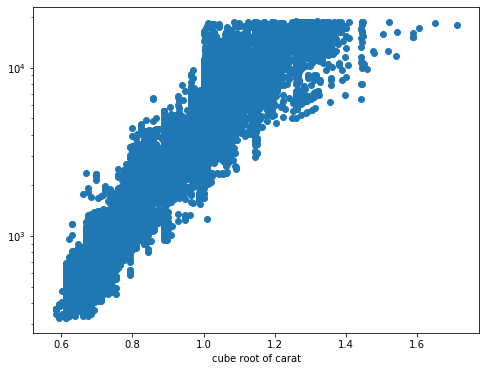

In [59]:
# Scatter plot of price vs. carat, with log transform on price axis and
# Cube-root transform on carat axis
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log');

**Price vs. Carat Polishing comment 1**: Use the following list to make sure you've checked the major points of revision in this plot.

* Does the plot has an informative title? no
* Are the axis labels informative? no
* Are the tick values interpretable? no
* Do we need to worry about any of the plot aesthetics?

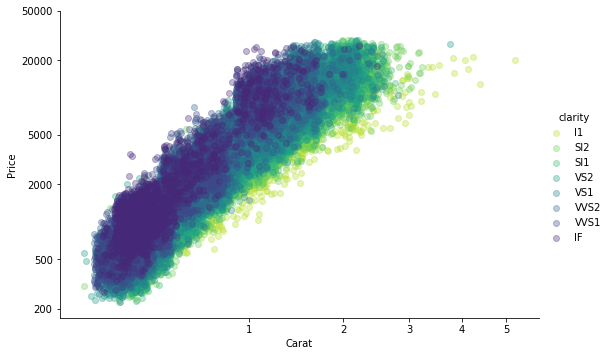

In [61]:
# Let's try to apply transformation functions to price and carat( x and y axis)
def log_trans(y, inverse = False):
    if not inverse:     
        return np.log10(y)     
    else:
        return np.power(10, y)
    
def cuberoot_trans(x, inverse = False):
    if not inverse:     
        return np.power(x, 1/3)     
    else:
        return np.power(x, 3)

#sb.regplot(diamonds['carat'].apply(cuberoot_trans), diamonds['price'].apply(log_trans))
diamonds['carat_cr'] = diamonds['carat'].apply(cuberoot_trans)
diamonds['price_log'] = diamonds['price'].apply(log_trans)

g = sb.FacetGrid( data = diamonds, hue = 'clarity', height = 5, aspect=1.5 , palette = 'viridis_r')
g = g.map(sb.regplot, 'carat_cr' ,'price_log', x_jitter = 0.04 , y_jitter = 0.2, scatter_kws = {'alpha' : 1/3} , fit_reg = False);
# pay attention what to be put inside map(), does it really need x = , y = 
g.add_legend()
plt.xlabel('Carat')
plt.ylabel('Price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
x_tick_locs = [1, 2, 3, 4, 5]
plt.xticks(cuberoot_trans(x_tick_locs), x_tick_locs)

y_tick_locs = [200, 500 , 2000, 5000, 20000,50000]    # the tick_locs should be set according to real values 
plt.yticks(log_trans(y_tick_locs), y_tick_locs);

**Price vs. Carat Polishing comment 2**: Here are some specific comments on the polishing of the plot.

* The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.
* As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.
* There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

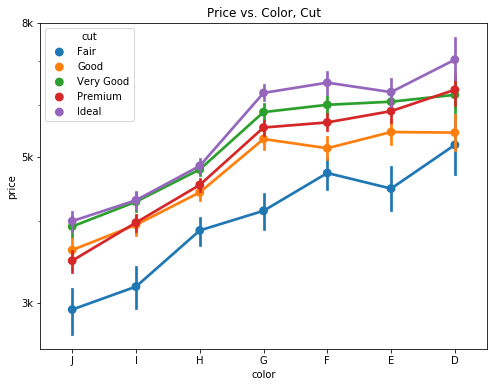

In [62]:
# Select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_sub = diamonds.loc[diamond_flag,:]

plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_sub, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)
plt.title('Price vs. Color, Cut')
plt.show();

**Price vs. Color, Cut: Polishing comment 1**: Don't forget to provide an informative title and axis labels.

**Price vs. Color, Cut: Polishing comment 2**: There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.

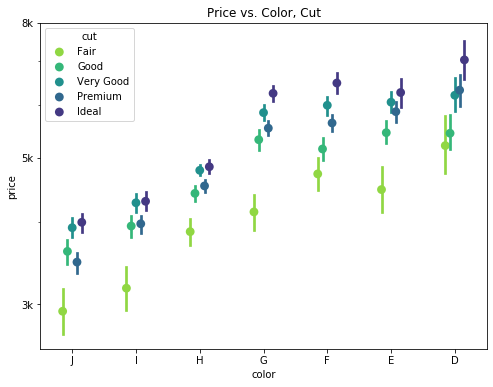

In [63]:
# The default color palette used is qualitative, but we should probably choose a sequential palette instead
# Select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_sub = diamonds.loc[diamond_flag,:]

plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_sub, x = 'color', y = 'price', hue = 'cut' , palette = 'viridis_r', dodge = 0.3, linestyles = "")

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)
plt.title('Price vs. Color, Cut')
plt.show();